In [46]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [2]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [3]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [4]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the logistic regression update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [24]:
learning_rate = 0.05
n_epochs = 100_000

lr = Logistic(learning_rate, n_epochs)
lr.train(X_train_MR, y_train_MR)

Epoch 0: unweighted max change in weights = 5101.5


c:\Users\matth\Documents\Homework\COMP5630\Assignment4\models\logistic.py:28: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Epoch 10000: unweighted max change in weights = 167.78699572174017
Epoch 20000: unweighted max change in weights = 1730.7939781803475
Epoch 30000: unweighted max change in weights = 2114.004744163989
Epoch 40000: unweighted max change in weights = 95.33304852591347
Epoch 50000: unweighted max change in weights = 93.97387976020585
Epoch 60000: unweighted max change in weights = 926.2881711574646
Epoch 70000: unweighted max change in weights = 91.65084144943941
Epoch 80000: unweighted max change in weights = 113.72581190112165
Epoch 90000: unweighted max change in weights = 1459.0611021164877


In [25]:
pred_lr = lr.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_MR)))

The training accuracy is given by: 96.081247


### Validate Logistic Classifer

In [26]:
pred_lr = lr.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_MR)))

The validation accuracy is given by: 96.184615


### Test Logistic Classifier

In [18]:
pred_lr = lr.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_MR)))

The testing accuracy is given by: 96.307692


## Create Plots

Learning Rate fixed at `0.05` and varying epochs between 100 and 100000

In [53]:
learning_rate = 0.05
start_epochs = 100
end_epochs = 100_000
epochs = np.logspace(np.log10(start_epochs), np.log10(end_epochs), num=100, dtype=int)
models = [Logistic(learning_rate, n_epochs) for n_epochs in epochs]
for model in tqdm(models):
    model.train(X_train_MR, y_train_MR)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\matth\Documents\Homework\COMP5630\Assignment4\models\logistic.py:28: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
100%|██████████| 100/100 [33:59<00:00, 20.39s/it] 


In [57]:
epochs_models = models[:]

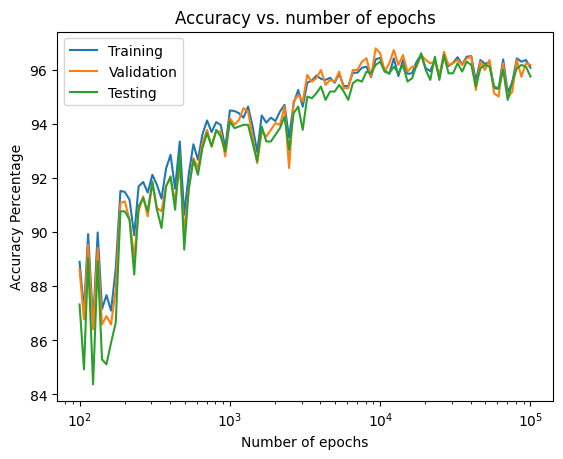

In [56]:
Y_train = [get_acc(model.predict(X_train_MR),  y_train_MR) for model in models]
Y_val = [get_acc(model.predict(X_val_MR),  y_val_MR) for model in models]
Y_test = [get_acc(model.predict(X_test_MR),  y_test_MR) for model in models]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epochs, Y_train, label='Training')
ax.plot(epochs, Y_val, label='Validation')
ax.plot(epochs, Y_test, label='Testing')
ax.set_xscale('log')
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Accuracy Percentage')
ax.set_title('Accuracy vs. number of epochs')
plt.legend()
plt.show()

Epochs fixed at `10000` and varying learning rate between 0.00001 and 0.1

In [58]:
epochs = 10_000
start_lr = 0.000_01
end_lr = 0.1
learning_rates = np.logspace(np.log10(start_lr), np.log10(end_lr), num=50)
models = [Logistic(learning_rate, epochs) for learning_rate in learning_rates]
for model in tqdm(models):
    model.train(X_train_MR, y_train_MR)

 50%|█████     | 25/50 [04:31<05:49, 13.99s/it]c:\Users\matth\Documents\Homework\COMP5630\Assignment4\models\logistic.py:28: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
100%|██████████| 50/50 [09:36<00:00, 11.52s/it]


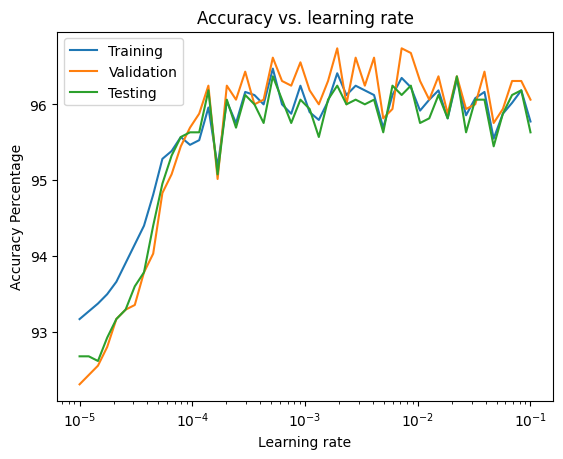

In [59]:
Y_train = [get_acc(model.predict(X_train_MR),  y_train_MR) for model in models]
Y_val = [get_acc(model.predict(X_val_MR),  y_val_MR) for model in models]
Y_test = [get_acc(model.predict(X_test_MR),  y_test_MR) for model in models]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(learning_rates, Y_train, label='Training')
ax.plot(learning_rates, Y_val, label='Validation')
ax.plot(learning_rates, Y_test, label='Testing')
ax.set_xscale('log')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Accuracy Percentage')
ax.set_title('Accuracy vs. learning rate')
plt.legend()
plt.show()